In [2]:
!pip install tensorflow==2.7.0 tensorflow-gpu==2.7.0 opencv-python mediapipe sklearn

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                 
    results = model.process(image)                 
    image.flags.writeable = True                  
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('k'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

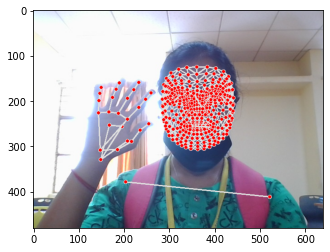

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint variables

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [12]:
print(len(pose))
print(len(face))
print(len(lh))
print(len(rh))

132
1404
63
63


In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)


In [15]:
result_test

array([ 0.58456457,  0.45268884, -0.83709669, ...,  0.23552488,
        0.35421073, -0.02701889])

# SETUP FOLDER FOR DATA

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [ ]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# Collect data for training and testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('k'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# preprocess data and create labels

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
X = np.array(sequences)

In [22]:
X.shape

(90, 30, 1662)

In [23]:
y = to_categorical(labels).astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [25]:
X_train.shape

(85, 30, 1662)


# Build and train LSTM Neural network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [27]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [28]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 123ms/step - loss: 35.0920 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 126ms/step - loss: 48.4837 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 118ms/step - loss: 67.1062 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 115ms/step - loss: 56.4187 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 0s 137ms/step - loss: 97.2524 - categorical_accuracy: 0.2118
Epoch 6/2000
3/3 [==============================] - 0s 123ms/step - loss: 108.7357 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 110ms/step - loss: 56.9437 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 128ms/step - loss: 55.2589 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 117ms/step - loss: 54.4074 - categorical

3/3 [==============================] - 0s 120ms/step - loss: 0.7229 - categorical_accuracy: 0.6353
Epoch 74/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.9777 - categorical_accuracy: 0.5176
Epoch 75/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.9921 - categorical_accuracy: 0.5059
Epoch 76/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.8021 - categorical_accuracy: 0.6000
Epoch 77/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.6531 - categorical_accuracy: 0.7412
Epoch 78/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6209 - categorical_accuracy: 0.6471
Epoch 79/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.6344 - categorical_accuracy: 0.7412
Epoch 80/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.1285 - categorical_accuracy: 0.5059
Epoch 81/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.8861 - categorical_accuracy: 0.57

3/3 [==============================] - 0s 110ms/step - loss: 0.5669 - categorical_accuracy: 0.6588
Epoch 146/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.4198 - categorical_accuracy: 0.7647
Epoch 147/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.4272 - categorical_accuracy: 0.7059
Epoch 148/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.9884 - categorical_accuracy: 0.7412
Epoch 149/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.4642 - categorical_accuracy: 0.7647
Epoch 150/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.4192 - categorical_accuracy: 0.7529
Epoch 151/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.3817 - categorical_accuracy: 0.7647
Epoch 152/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.4333 - categorical_accuracy: 0.7882
Epoch 153/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.3923 - categorical_accura

3/3 [==============================] - 0s 110ms/step - loss: 1.7241 - categorical_accuracy: 0.3294
Epoch 217/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.3965 - categorical_accuracy: 0.3294
Epoch 218/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.3259 - categorical_accuracy: 0.3765
Epoch 219/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.4925 - categorical_accuracy: 0.3412
Epoch 220/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.6339 - categorical_accuracy: 0.4471
Epoch 221/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.2825 - categorical_accuracy: 0.3176
Epoch 222/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.9959 - categorical_accuracy: 0.3412
Epoch 223/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.6208 - categorical_accuracy: 0.3412
Epoch 224/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.8082 - categorical_accura

3/3 [==============================] - 0s 114ms/step - loss: 1.0948 - categorical_accuracy: 0.3059
Epoch 288/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0718 - categorical_accuracy: 0.3882
Epoch 289/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0715 - categorical_accuracy: 0.4235
Epoch 290/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0688 - categorical_accuracy: 0.4118
Epoch 291/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0563 - categorical_accuracy: 0.4118
Epoch 292/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0364 - categorical_accuracy: 0.4588
Epoch 293/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0342 - categorical_accuracy: 0.4588
Epoch 294/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0252 - categorical_accuracy: 0.5059
Epoch 295/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0264 - categorical_accura

Epoch 359/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.8842 - categorical_accuracy: 0.6588
Epoch 360/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6886 - categorical_accuracy: 0.7412
Epoch 361/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.4784 - categorical_accuracy: 0.7765
Epoch 362/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.4450 - categorical_accuracy: 0.8000
Epoch 363/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3975 - categorical_accuracy: 0.8235
Epoch 364/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.3357 - categorical_accuracy: 0.8706
Epoch 365/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.3158 - categorical_accuracy: 0.8824
Epoch 366/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.3428 - categorical_accuracy: 0.8588
Epoch 367/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3643 - cat

3/3 [==============================] - 0s 125ms/step - loss: 0.1580 - categorical_accuracy: 0.9647
Epoch 431/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.1581 - categorical_accuracy: 0.9647
Epoch 432/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1850 - categorical_accuracy: 0.9294
Epoch 433/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.1476 - categorical_accuracy: 0.9647
Epoch 434/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1992 - categorical_accuracy: 0.9294
Epoch 435/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.2042 - categorical_accuracy: 0.9059
Epoch 436/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.1495 - categorical_accuracy: 0.9529
Epoch 437/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2491 - categorical_accuracy: 0.9294
Epoch 438/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.2492 - categorical_accura

Epoch 502/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0530 - categorical_accuracy: 0.9882
Epoch 503/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0464 - categorical_accuracy: 0.9882
Epoch 504/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0468 - categorical_accuracy: 0.9882
Epoch 505/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0357 - categorical_accuracy: 0.9882
Epoch 506/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0953 - categorical_accuracy: 0.9765
Epoch 507/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0727 - categorical_accuracy: 0.9882
Epoch 508/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0738 - categorical_accuracy: 0.9765
Epoch 509/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0942 - categorical_accuracy: 0.9882
Epoch 510/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0646 - cat

3/3 [==============================] - 0s 132ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0109 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0100 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0096 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0094 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0092 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.0094 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0095 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0090 - categorical_accura

KeyboardInterrupt: 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# make predictions

In [34]:
res=model.predict(X_test)

In [35]:
actions[np.argmax(res[4])]

'thanks'

In [36]:
actions[np.argmax(y_test[4])]

'thanks'

# Save weights

In [37]:
model.save('action.h5')

In [38]:
model.load_weights('action.h5')

# Evaluation using confusion matrix and accuracy

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [40]:
yhat = model.predict(X_train)

In [41]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [42]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[59,  0],
        [ 0, 26]],

       [[55,  0],
        [ 0, 30]]], dtype=int64)

In [43]:
accuracy_score(ytrue, yhat)

1.0

# Test in Real Time

In [44]:
from scipy import stats

In [45]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

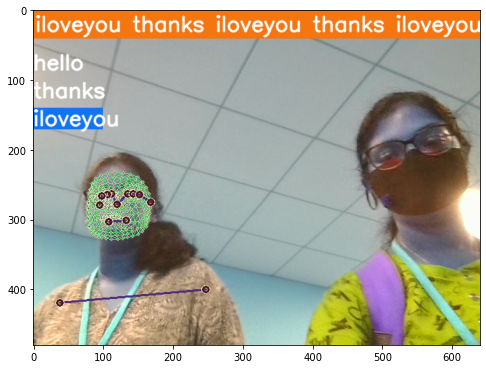

In [49]:
plt.figure(figsize=(8,8))
plt.imshow(prob_viz(res, actions, image, colors))

In [48]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('k'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me